## 사용 패키지

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.ensemble import RandomForestRegressor

from pycaret.regression import *

## 데이터 로드

In [2]:
train = pd.read_csv('C:/Users/user/Documents/dacon-fd/train.csv')
test = pd.read_csv('C:/Users/user/Documents/dacon-fd/test.csv')
submission = pd.read_csv('C:/Users/user/Documents/dacon-fd/sample_submission.csv')

In [86]:
# temp.columns = ['일자','기온','풍속','체감기온']

In [87]:
# train = pd.merge(train, temp)
# test = pd.merge(test, temp)

In [88]:
# rain.columns = ['일자', '강수량']
# rain.fillna(0, inplace=True)

In [89]:
# train = pd.merge(train,rain)
# test = pd.merge(test, rain)

In [90]:
# plt.figure(figsize=(12,6))
# sns.barplot(train['일'], train['강수량'])

In [91]:
# plt.figure(figsize=(12,6))
# sns.regplot(train2['강수량'] , train2['중식계'])

In [92]:
# expr = train['강수량'] > 80

In [93]:
# train2 = train[expr]

In [94]:
# train2

In [95]:
train.corr()

본사정원수    본사휴가자수    본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
본사정원수           1.000000  0.244666 -0.061688        0.146544     0.452293   
본사휴가자수          0.244666  1.000000 -0.273318       -0.230789     0.065397   
본사출장자수         -0.061688 -0.273318  1.000000       -0.308757    -0.352643   
본사시간외근무명령서승인건수  0.146544 -0.230789 -0.308757        1.000000     0.156792   
현본사소속재택근무자수     0.452293  0.065397 -0.352643        0.156792     1.000000   
중식계            -0.115529 -0.391975 -0.512680        0.535611     0.076509   
석식계            -0.173852 -0.316894 -0.188164        0.571168    -0.057534   

                     중식계       석식계  
본사정원수          -0.115529 -0.173852  
본사휴가자수         -0.391975 -0.316894  
본사출장자수         -0.512680 -0.188164  
본사시간외근무명령서승인건수  0.535611  0.571168  
현본사소속재택근무자수     0.076509 -0.057534  
중식계             1.000000  0.508287  
석식계             0.508287  1.000000

## 데이터

## 요일을 숫자로 매핑

In [96]:
#train['요일'] = train['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})
#test['요일'] = test['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})

## `요일 랭크지정 방식.`
## 석식에만 적용! 석식 수요일이 자기개발의 날 때문에 적어서.

In [3]:
weekdayrankfordinner = {
    '월' : 1,
    '화' : 2,
    '수' : 5,
    '목' : 3,
    '금' : 4
} 

train['요일(석식)'] = train['요일'].map(weekdayrankfordinner)
test['요일(석식)'] = test['요일'].map(weekdayrankfordinner)

## `월, 일을 숫자형으로 변환`

In [4]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

print(train['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.isocalendar().week
train['요일'] = train['일자'].dt.weekday


test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.isocalendar().week
test['요일'] = test['일자'].dt.weekday

train['주'] = train['주'].astype('int') # '주'의 타입이 Uint로 사용이 안되어 int로 변경해줌.
test['주'] = test['주'].astype('int')

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]


## `0712 비율변수 추가`

In [99]:
train['휴가비율'] = train['본사휴가자수']/train['본사정원수']
train['출장비율'] = train['본사출장자수']/train['본사정원수']
train['재택비율'] = train['현본사소속재택근무자수']/train['본사정원수']


test['휴가비율'] = test['본사휴가자수']/test['본사정원수']
test['출장비율'] = test['본사출장자수']/test['본사정원수']
test['재택비율'] = test['현본사소속재택근무자수']/test['본사정원수']

<AxesSubplot:xlabel='월', ylabel='중식계'>

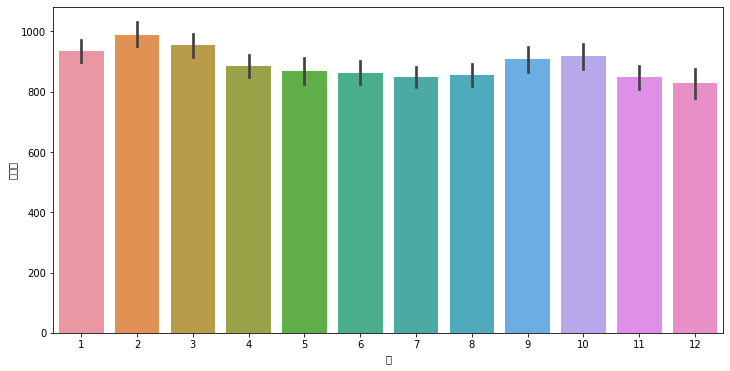

In [100]:
plt.figure(figsize=(12,6))
sns.barplot(train['월'], train['중식계'])

<AxesSubplot:xlabel='월', ylabel='석식계'>

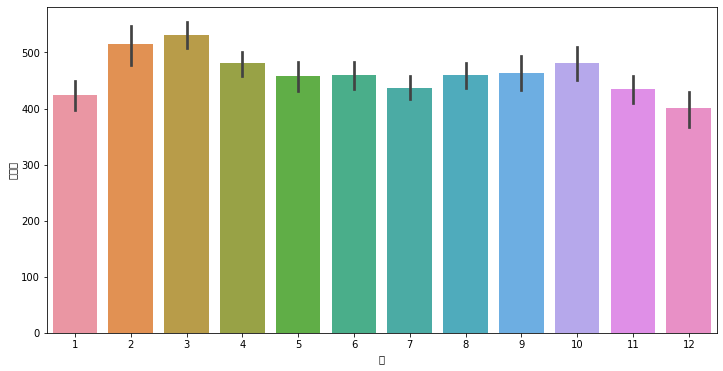

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(train['월'], train['석식계'])

In [5]:
sampletrain = train.loc[:,('주','중식계','석식계')]
sampletrain.groupby(['주']).mean().iloc[:,0].sort_values()

주
52     672.571429
31     761.920000
33     793.000000
30     807.360000
32     822.200000
18     823.500000
46     824.040000
45     826.080000
47     826.120000
21     834.750000
44     847.080000
23     849.476190
51     857.320000
43     859.120000
28     859.600000
29     862.280000
42     863.720000
24     865.458333
17     873.400000
22     879.000000
26     879.700000
25     881.200000
27     881.217391
20     884.440000
15     889.750000
14     892.160000
16     893.375000
50     894.760000
19     897.095238
1      898.727273
3      910.960000
39     911.100000
36     911.520000
48     912.560000
2      913.680000
4      915.250000
37     916.250000
34     918.750000
13     921.400000
49     927.720000
35     933.760000
38     933.760000
12     954.360000
11     955.560000
6      966.157895
5      978.695652
9      983.190476
8      983.200000
10     984.000000
41     999.761905
7     1017.173913
40    1060.125000
Name: 중식계, dtype: float64

In [6]:
sampletrain.groupby(['주']).mean().iloc[:,1].sort_values()

주
52    216.952381
1     392.181818
31    399.000000
4     404.650000
48    404.840000
30    415.160000
26    417.550000
51    419.600000
43    422.800000
44    423.280000
46    426.720000
2     426.880000
17    430.520000
22    433.680000
33    434.285714
39    434.550000
29    434.800000
3     435.200000
32    437.640000
45    440.400000
18    441.937500
5     442.826087
47    443.480000
35    450.200000
23    457.333333
28    457.600000
37    458.850000
21    459.458333
19    464.523810
27    467.086957
24    470.083333
42    476.960000
9     479.428571
20    484.640000
38    484.680000
50    485.720000
25    490.350000
13    492.720000
16    494.666667
49    494.960000
12    505.040000
36    505.400000
15    508.000000
14    511.120000
34    512.958333
6     517.684211
11    539.120000
8     540.520000
7     541.391304
41    558.333333
10    577.240000
40    611.500000
Name: 석식계, dtype: float64

In [7]:
sampletrain = train.loc[:,('월','중식계','석식계')]
sampletrain.groupby(['월']).mean()

중식계         석식계
월                         
1   934.247525  424.564356
2   989.623656  514.860215
3   953.607477  530.700935
4   883.621359  480.825243
5   869.787879  458.131313
6   863.311111  460.355556
7   848.736364  437.300000
8   854.785047  459.485981
9   907.148936  463.617021
10  917.771739  481.641304
11  847.333333  434.250000
12  827.336634  401.168317

In [8]:
expr = (train['년']>=2020) & (train['월'] >=1) & (train['월']<=4 )

In [9]:
train[expr].mean()

요일                   1.969697
본사정원수             2916.272727
본사휴가자수             141.030303
본사출장자수             194.181818
본사시간외근무명령서승인건수     347.727273
현본사소속재택근무자수        180.494949
중식계                931.979798
석식계                459.676768
요일(석식)               2.959596
년                 2020.171717
월                    2.252525
일                   15.464646
주                    8.373737
dtype: float64

## `월 랭크지정 방식` 낮은게 12 큰게 1 요일 랭크와 동일

In [10]:
month1 = {
    1:3,
    2:1,
    3:2,
    4:6,
    5:7,
    6:8,
    7:10,
    8:9,
    9:5,
    10:4,
    11:11,
    12:12
}

month2 = {
    1:11,
    2:2,
    3:1,
    4:4,
    5:8,
    6:6,
    7:9,
    8:7,
    9:5,
    10:3,
    11:10,
    12:12
}
train['월(중식)'] = train['월'].map(month1)
test['월(중식)'] = test['월'].map(month1)

train['월(석식)'] = train['월'].map(month2)
test['월(석식)'] = test['월'].map(month2)

train['월(중식)'] = train['월(중식)'].astype('int') # float형이라 int로 변경
test['월(중식)'] = test['월(중식)'].astype('int')
train['월(석식)'] = train['월(석식)'].astype('int')
test['월(석식)'] = test['월(석식)'].astype('int')

## `주 랭크지정 방식`


In [11]:
#중식
week1 = {
    52	:	52	,
    31	:	51	,
    33	:	50	,
    30	:	49	,
    32	:	48	,
    18	:	47	,
    46	:	46	,
    45	:	45	,
    47	:	44	,
    21	:	43	,
    44	:	42	,
    23	:	41	,
    51	:	40	,
    43	:	39	,
    28	:	38	,
    29	:	37	,
    42	:	36	,
    24	:	35	,
    17	:	34	,
    22	:	33	,
    26	:	32	,
    25	:	31	,
    27	:	30	,
    20	:	29	,
    15	:	28	,
    14	:	27	,
    16	:	26	,
    50	:	25	,
    19	:	24	,
    1	:	23	,
    3	:	22	,
    39	:	21	,
    36	:	20	,
    48	:	19	,
    2	:	18	,
    4	:	17	,
    37	:	16	,
    34	:	15	,
    13	:	14	,
    49	:	13	,
    35	:	12	,
    38	:	11	,
    12	:	10	,
    11	:	9	,
    6	:	8	,
    5	:	7	,
    9	:	6	,
    8	:	5	,
    10	:	4	,
    41	:	3	,
    7	:	2	,
    40	:	1	
}

#석식 위부터 작은수임

week2 = {
    52	:	52	,
    1	:	51	,
    31	:	50	,
    4	:	49	,
    48	:	48	,
    30	:	47	,
    26	:	46	,
    51	:	45	,
    43	:	44	,
    44	:	43	,
    46	:	42	,
    2	:	41	,
    17	:	40	,
    22	:	39	,
    33	:	38	,
    39	:	37	,
    29	:	36	,
    3	:	35	,
    32	:	34	,
    45	:	33	,
    18	:	32	,
    5	:	31	,
    47	:	30	,
    35	:	29	,
    23	:	28	,
    28	:	27	,
    37	:	26	,
    21	:	25	,
    19	:	24	,
    27	:	23	,
    24	:	22	,
    42	:	21	,
    9	:	20	,
    20	:	19	,
    38	:	18	,
    50	:	17	,
    25	:	16	,
    13	:	15	,
    16	:	14	,
    49	:	13	,
    12	:	12	,
    36	:	11	,
    15	:	10	,
    14	:	9	,
    34	:	8	,
    6	:	7	,
    11	:	6	,
    8	:	5	,
    7	:	4	,
    41	:	3	,
    10	:	2	,
    40	:	1	
}

train['주(중식)'] = train['주'].map(week1)
test['주(중식)'] = test['주'].map(week1)

train['주(석식)'] = train['주'].map(week2)
test['주(석식)'] = test['주'].map(week2)

train['주(중식)'] = train['주(중식)'].astype('int') # float형이라 int로 변경
test['주(중식)'] = test['주(중식)'].astype('int')
train['주(석식)'] = train['주(석식)'].astype('int')
test['주(석식)'] = test['주(석식)'].astype('int')

## `연도 랭크지정 방식` 효과 X

## `일 랭크지정방식 ` 효과 X 사용안함

## `식사가능자수`

In [12]:
train['식사가능자수'] = (train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'])
test['식사가능자수'] = (test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'])

In [110]:
#train['중식참여율'] = train['중식계'] / train['식사가능자수']
#train['석식참여율'] = train['석식계'] / train['식사가능자수']

#test['중식참여율'] = test['중식계'] / test['식사가능자수']
#test['석식참여율'] = test['석식계'] / test['식사가능자수']

In [111]:
train['식사가능자수']

0       2551.0
1       2551.0
2       2545.0
3       2497.0
4       2323.0
         ...  
1200    2517.0
1201    2540.0
1202    2425.0
1203    2549.0
1204    2552.0
Name: 식사가능자수, Length: 1205, dtype: float64

In [112]:
train['출근비율'] = train['식사가능자수']/train['본사정원수']
test['출근비율'] = test['식사가능자수']/test['본사정원수']

# `0708 공휴일 전후 추가 `

In [13]:
drops = ['조식메뉴', '중식메뉴', '석식메뉴']

train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)

In [14]:
train['공휴일전후'] = 0
test['공휴일전후'] = 0

In [15]:
train['공휴일전후'][17] = 1
train['공휴일전후'][4] = 1
#train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][226] = 1
train['공휴일전후'][221] = 1
#train['공휴일전후'][222] = 1
train['공휴일전후'][224] = 1
train['공휴일전후'][225] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][310] = 2
train['공휴일전후'][311] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 2
# train['공휴일전후'][501] = 1
train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 2
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 2
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 2
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 2
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 2
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

test['공휴일전후'][10] =2
test['공휴일전후'][20] = 1

In [16]:
# 원핫인코딩
train = pd.get_dummies(train, columns=['공휴일전후'])
test = pd.get_dummies(test, columns=['공휴일전후'])

In [117]:
test.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '요일(석식)', '년', '월', '일', '주', '휴가비율', '출장비율', '재택비율',
       '월(중식)', '월(석식)', '주(중식)', '주(석식)', '식사가능자수', '출근비율', '공휴일전후_0',
       '공휴일전후_1', '공휴일전후_2'],
      dtype='object')

In [17]:
train['ln_vac'] = np.log(train['본사휴가자수'])
test['ln_vac'] = np.log(test['본사휴가자수'])

In [21]:
test['공휴일전후_1'][20] = 0
test['공휴일전후_0'][20] = 1

In [22]:
train[train['공휴일전후']>0]

KeyError: '공휴일전후'

## Feature

In [23]:
x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #중식계
x2_train = train[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]
x2_test = test[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수', '월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]

# `Catboost 만 `

In [24]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [25]:
model1 = cat
model2 = cat

model1.fit(x1_train, y1_train) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train) #석식계
pred2 = model2.predict(x2_test)

submission['중식계'] = pred1
submission['석식계'] = pred2

submission.to_csv('cat_mae3.csv', index=False)

Learning rate set to 0.040347
0:	learn: 203.7657572	total: 135ms	remaining: 2m 14s
1:	learn: 198.8397145	total: 136ms	remaining: 1m 8s
2:	learn: 193.8449503	total: 138ms	remaining: 45.7s
3:	learn: 189.4059077	total: 138ms	remaining: 34.5s
4:	learn: 185.2646636	total: 140ms	remaining: 27.8s
5:	learn: 181.0579138	total: 141ms	remaining: 23.3s
6:	learn: 176.9944339	total: 142ms	remaining: 20.1s
7:	learn: 173.0343166	total: 143ms	remaining: 17.7s
8:	learn: 169.2847999	total: 144ms	remaining: 15.9s
9:	learn: 165.7634692	total: 145ms	remaining: 14.4s
10:	learn: 162.3163108	total: 146ms	remaining: 13.2s
11:	learn: 158.9027017	total: 147ms	remaining: 12.1s
12:	learn: 156.0506426	total: 148ms	remaining: 11.3s
13:	learn: 153.5771069	total: 149ms	remaining: 10.5s
14:	learn: 150.7610607	total: 150ms	remaining: 9.88s
15:	learn: 148.0510638	total: 151ms	remaining: 9.31s
16:	learn: 145.6633184	total: 152ms	remaining: 8.81s
17:	learn: 143.4048205	total: 153ms	remaining: 8.36s
18:	learn: 141.2397311	to

In [226]:
x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #중식계
x2_train = train[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]
x2_test = test[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수', '월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]

In [26]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

In [27]:
model = cb.CatBoostRegressor(loss_function ='MAE')

In [29]:
x1_train

요일  본사시간외근무명령서승인건수  식사가능자수  월(중식)   일  공휴일전후_0  공휴일전후_1  공휴일전후_2  본사출장자수
0      0             238  2551.0      1   1        1        0        0     150
1      1             319  2551.0      1   2        1        0        0     173
2      2             111  2545.0      1   3        1        0        0     180
3      3             355  2497.0      1   4        1        0        0     220
4      4              34  2323.0      1   5        0        1        0     181
...   ..             ...     ...    ...  ..      ...      ...      ...     ...
1200   2               4  2517.0      3  20        1        0        0     198
1201   3             462  2540.0      3  21        1        0        0     231
1202   4               1  2425.0      3  22        1        0        0     248
1203   0             616  2549.0      3  25        1        0        0     153
1204   1             551  2552.0      3  26        1        0        0     183

[1205 rows x 9 columns]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x1_train, y1_train, test_size = 0.2, random_state=5)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2_train, y2_train, test_size = 0.2, random_state=5)

In [231]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
train_dataset2 = cb.Pool(X_train2, y_train2) 
test_dataset2 = cb.Pool(X_test2, y_test2)

In [232]:
model1 = cb.CatBoostRegressor(loss_function ='MAE')
model2 = cb.CatBoostRegressor(loss_function ='MAE')

In [233]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model1.grid_search(grid, train_dataset)
model2.grid_search(grid, train_dataset2)

0:	learn: 858.3024380	test: 859.6915540	best: 859.6915540 (0)	total: 23.3ms	remaining: 2.31s
1:	learn: 833.0806207	test: 834.7221426	best: 834.7221426 (1)	total: 27.6ms	remaining: 1.35s
2:	learn: 808.5845722	test: 810.2198552	best: 810.2198552 (2)	total: 28.3ms	remaining: 914ms
3:	learn: 784.4633065	test: 785.9913817	best: 785.9913817 (3)	total: 31.2ms	remaining: 749ms
4:	learn: 761.7643225	test: 763.1979540	best: 763.1979540 (4)	total: 34.5ms	remaining: 655ms
5:	learn: 739.0787006	test: 740.7180822	best: 740.7180822 (5)	total: 39ms	remaining: 611ms
6:	learn: 717.3788181	test: 719.2191725	best: 719.2191725 (6)	total: 40.1ms	remaining: 532ms
7:	learn: 696.4262547	test: 698.1840628	best: 698.1840628 (7)	total: 41.2ms	remaining: 474ms
8:	learn: 675.6972152	test: 677.3734732	best: 677.3734732 (8)	total: 56.3ms	remaining: 569ms
9:	learn: 656.3199051	test: 658.0086776	best: 658.0086776 (9)	total: 57ms	remaining: 513ms
10:	learn: 636.7926621	test: 638.6399162	best: 638.6399162 (10)	total: 57.

{'params': {'depth': 8,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [234]:
pred = model1.predict(X_test)
mae = (mean_absolute_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Testing performance
MAE: 72.20
R2: 0.81


In [235]:
pred = model2.predict(X_test2)
mae = (mean_absolute_error(y_test2, pred))
r2 = r2_score(y_test2, pred)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Testing performance
MAE: 61.49
R2: 0.58


In [ ]:
pred = model.predict(X_test)
mae = (mean_absolute_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

In [194]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 101.87
R2: 0.78


In [165]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 73.81
R2: 0.80


In [ ]:
x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','ln_vac']] #중식계
x2_train = train[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','ln_vac']]
x2_test = test[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수', '월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]

In [208]:
train_dataset_l = cb.Pool(x1_train,y1_train)
train_dataset_d = cb.Pool(x2_train,y2_train)
model_l = cb.CatBoostRegressor(loss_function ='MAE')
model_d = cb.CatBoostRegressor(loss_function ='MAE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model_l.grid_search(grid, train_dataset_l)
model_d.grid_search(grid, train_dataset_d)
pred_l = model_l.predict(x1_test)
pred_d= model_d.predict(x2_test)

submission['중식계'] = pred_l
submission['석식계'] = pred_d

submission.to_csv('cat_mae2.csv', index=False)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 860.0548232	test: 880.8695017	best: 880.8695017 (0)	total: 13.5ms	remaining: 1.34s
1:	learn: 834.1388775	test: 854.1358132	best: 854.1358132 (1)	total: 27.3ms	remaining: 1.34s
2:	learn: 809.7093616	test: 829.5399212	best: 829.5399212 (2)	total: 32.1ms	remaining: 1.04s
3:	learn: 785.1945419	test: 804.9901363	best: 804.9901363 (3)	total: 34.2ms	remaining: 822ms
4:	learn: 761.3765336	test: 780.4110224	best: 780.4110224 (4)	total: 35.3ms	remaining: 671ms
5:	learn: 738.6063616	test: 757.6174211	best: 757.6174211 (5)	total: 36.3ms	remaining: 569ms
6:	learn: 716.8661751	test: 735.8998240	best: 735.8998240 (6)	total: 40.9ms	remaining: 543ms
7:	learn: 695.3610419	test: 714.3246955	best: 714.3246955 (7)	total: 42.4ms	remaining: 488ms
8:	learn: 674.6341053	test: 693.6402578	best: 693.6402578 (8)	total: 44.1ms	remaining: 446ms
9:	learn: 655.0833592	test: 674.1081251	best: 674.1081251 (9)	total: 45.5ms	remaining: 409ms
10:	learn: 635.7830512	test: 654.8706803	best: 654.8706803 (10)	total:

- cat_5_holi 의미 있으면 
- cat_mae,dw 진행 
- 있으면 
    - cat_mae2(+ln_vac), 
- 없으면 
    - cat_5_ln 진행


cat_5_holi 의미 없으면 -> 공휴일 이전 걸로 프로젝트 진행

- cat4로 cat_mae다시 만들어서 진행
    - cat_mae,dw  의미 있으면 cat_mae2(+ln_vac),
- 없으면 
    - cat_4_ln 진행(만들어서)


In [221]:
x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #중식계
x2_train = train[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]
x2_test = test[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수', '월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]

In [222]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1_train, y1_train, test_size = 0.2, random_state=5)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2_train, y2_train, test_size = 0.2, random_state=5)

In [223]:
model1 = cat
model2 = cat

model1.fit(X1_train, Y1_train) #중식계
pred1 = model1.predict(X1_test)

model2.fit(X2_train, Y2_train) #석식계
pred2 = model2.predict(X2_test)

#submission['중식계'] = pred1
#submission['석식계'] = pred2

Learning rate set to 0.038776
0:	learn: 198.9627235	total: 6.07ms	remaining: 6.07s
1:	learn: 194.7425491	total: 11.1ms	remaining: 5.53s
2:	learn: 190.1612458	total: 14ms	remaining: 4.65s
3:	learn: 186.0655879	total: 16ms	remaining: 3.97s
4:	learn: 182.2196031	total: 18.3ms	remaining: 3.63s
5:	learn: 178.2989137	total: 21.1ms	remaining: 3.49s
6:	learn: 174.3939005	total: 23.6ms	remaining: 3.35s
7:	learn: 170.9119525	total: 26.2ms	remaining: 3.25s
8:	learn: 167.4996439	total: 34.5ms	remaining: 3.8s
9:	learn: 164.2581867	total: 38.2ms	remaining: 3.79s
10:	learn: 161.0102488	total: 42.5ms	remaining: 3.82s
11:	learn: 157.9071073	total: 50.2ms	remaining: 4.13s
12:	learn: 155.3147503	total: 52.4ms	remaining: 3.98s
13:	learn: 152.5950248	total: 54.6ms	remaining: 3.85s
14:	learn: 149.9383446	total: 57.5ms	remaining: 3.78s
15:	learn: 147.4422355	total: 59.5ms	remaining: 3.66s
16:	learn: 145.1897677	total: 62.2ms	remaining: 3.6s
17:	learn: 143.0754164	total: 65ms	remaining: 3.54s
18:	learn: 141.1

In [224]:
mae = (mean_absolute_error(Y1_test, pred1))
r2 = r2_score(Y1_test, pred1)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Testing performance
MAE: 73.98
R2: 0.81


In [225]:
mae = (mean_absolute_error(Y2_test, pred2))
r2 = r2_score(Y2_test, pred2)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Testing performance
MAE: 59.87
R2: 0.60
